In [1]:
import pandas as pd

file_path = 'df_회원정보_201812.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())  
print(data.info()) 

     기준년월 발급회원번호  남녀구분코드  연령  VIP등급코드  최상위카드등급코드  회원여부_이용가능  소지여부_신용  \
0  201812  SYN_0       2  40      7.0        NaN          1        1   
1  201812  SYN_1       1  30      NaN        1.0          1        1   
2  201812  SYN_2       2  40      NaN        NaN          1        1   
3  201812  SYN_3       1  40      NaN        NaN          1        1   
4  201812  SYN_4       2  40      NaN        NaN          0        1   

   소지카드수_유효_신용  입회경과개월수_신용  회원여부_연체 가입통신회사코드 거주시도명 직장시도명  카드신청건수  Life_Stage  
0            1          71        0      LGT    경기    경기       0           5  
1            1          16        0      KTF    서울    서울       0           4  
2            1           6        0      SKT    충남    충남       0           4  
3            2         153        0      SKT    충남    충남       0           4  
4            1          79        0      KTF    부산    부산       0           5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999184 entries, 0 to 2999183
Data columns 

In [2]:
data.describe

<bound method NDFrame.describe of            기준년월       발급회원번호  남녀구분코드  연령  VIP등급코드  최상위카드등급코드  회원여부_이용가능  \
0        201812        SYN_0       2  40      7.0        NaN          1   
1        201812        SYN_1       1  30      NaN        1.0          1   
2        201812        SYN_2       2  40      NaN        NaN          1   
3        201812        SYN_3       1  40      NaN        NaN          1   
4        201812        SYN_4       2  40      NaN        NaN          0   
...         ...          ...     ...  ..      ...        ...        ...   
2999179  201812  SYN_2999995       2  30      NaN        NaN          1   
2999180  201812  SYN_2999996       1  50      7.0        NaN          1   
2999181  201812  SYN_2999997       2  50      NaN        3.0          1   
2999182  201812  SYN_2999998       1  20      NaN        NaN          1   
2999183  201812  SYN_2999999       1  50      NaN        NaN          0   

         소지여부_신용  소지카드수_유효_신용  입회경과개월수_신용  회원여부_연체 가입통신회사코드 거주시도명

In [5]:
data['연령'].describe

<bound method NDFrame.describe of 0          40
1          30
2          40
3          40
4          40
           ..
2999179    30
2999180    50
2999181    50
2999182    20
2999183    50
Name: 연령, Length: 2999184, dtype: int64>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm


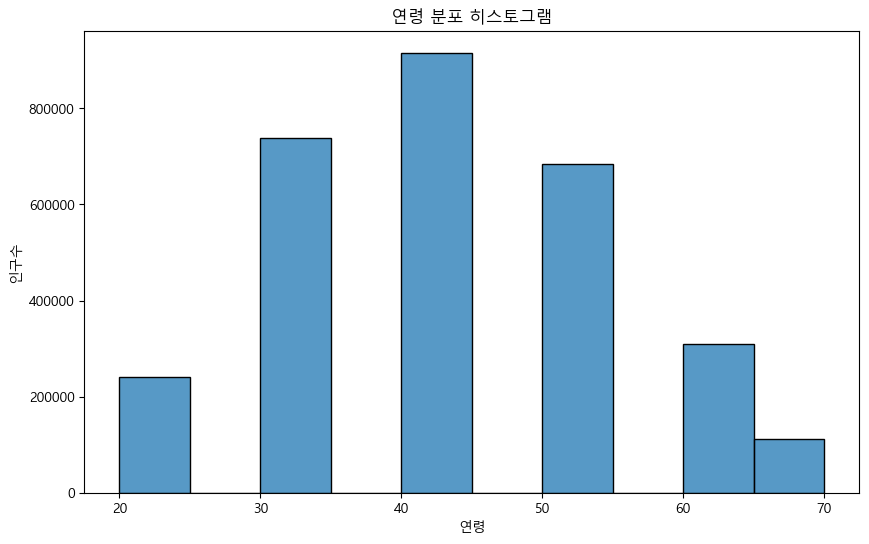

In [24]:
# 연령 분포
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
sns.histplot(data['연령'], bins=10, kde=False)
plt.title('연령 분포 히스토그램')
plt.xlabel('연령')
plt.ylabel('인구수')

plt.show()

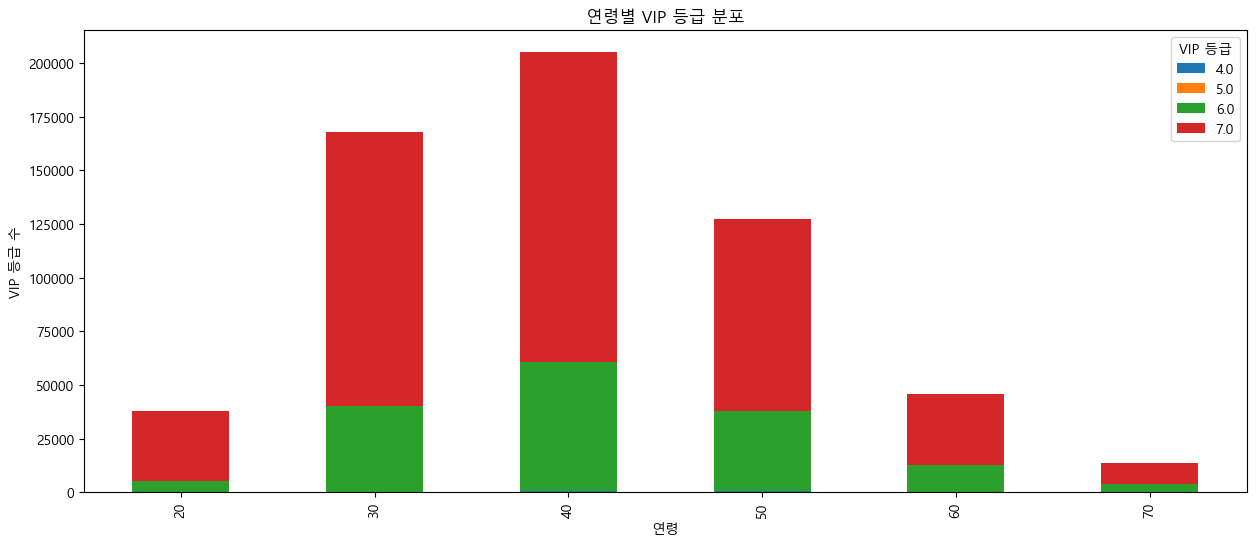

In [15]:
# 연령대별 VIP 등급 분포
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

vip_counts_by_age = data.groupby('연령')['VIP등급코드'].value_counts().unstack().fillna(0)
vip_counts_by_age.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('연령별 VIP 등급 분포')
plt.xlabel('연령')
plt.ylabel('VIP 등급 수')
plt.legend(title='VIP 등급')
plt.show()

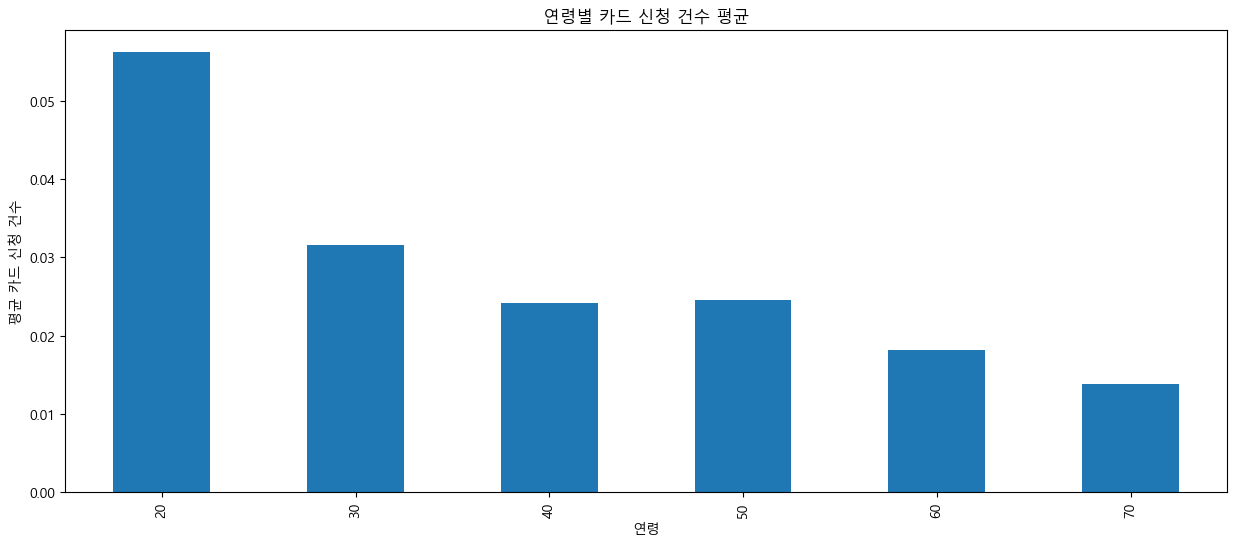

In [ ]:
# 평균 카드 신청 건수
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

avg_card_application_by_age = data.groupby('연령')['카드신청건수'].mean()
avg_card_application_by_age.plot(kind='bar', figsize=(15,6))
plt.title('연령별 카드 신청 건수 평균')
plt.xlabel('연령')
plt.ylabel('평균 카드 신청 건수')
plt.show()

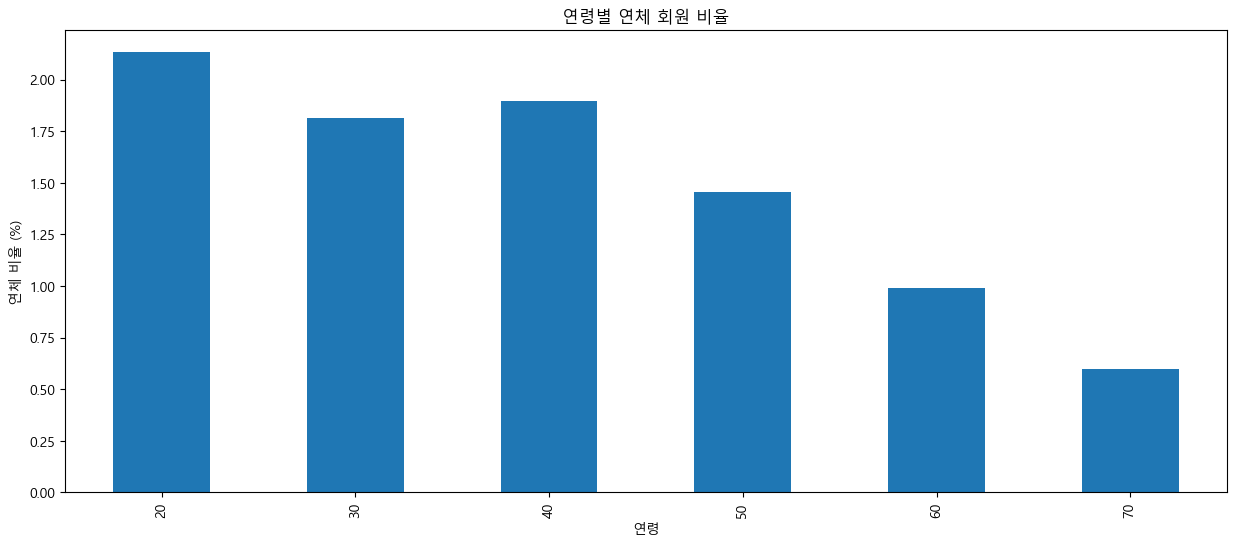

In [18]:
# 연령별 연체 회원 비율
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

연체_회원 = data.groupby('연령')['회원여부_연체'].sum()
총_회원 = data.groupby('연령')['회원여부_연체'].count()
연체_비율 = (연체_회원 / 총_회원) * 100

연체_비율.plot(kind='bar', figsize=(15,6))
plt.title('연령별 연체 회원 비율')
plt.xlabel('연령')
plt.ylabel('연체 비율 (%)')
plt.show()


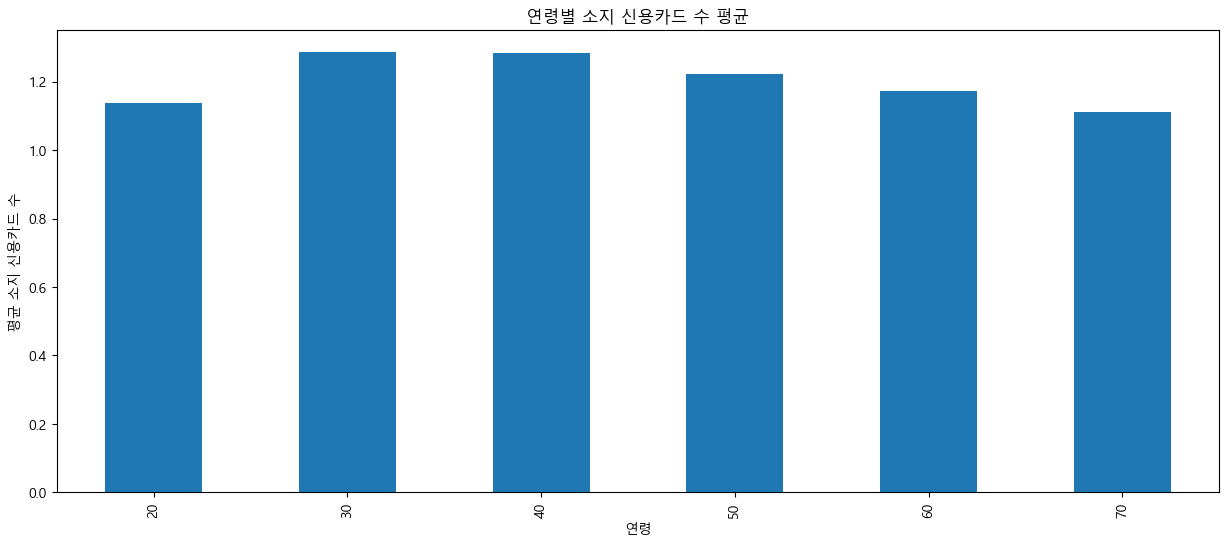

In [ ]:
# 연령별 평균 소지 신용카드 수
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

avg_credit_cards_by_age = data.groupby('연령')['소지카드수_유효_신용'].mean()
avg_credit_cards_by_age.plot(kind='bar', figsize=(15,6))
plt.title('연령별 소지 신용카드 수 평균')
plt.xlabel('연령')
plt.ylabel('평균 소지 신용카드 수')
plt.show()

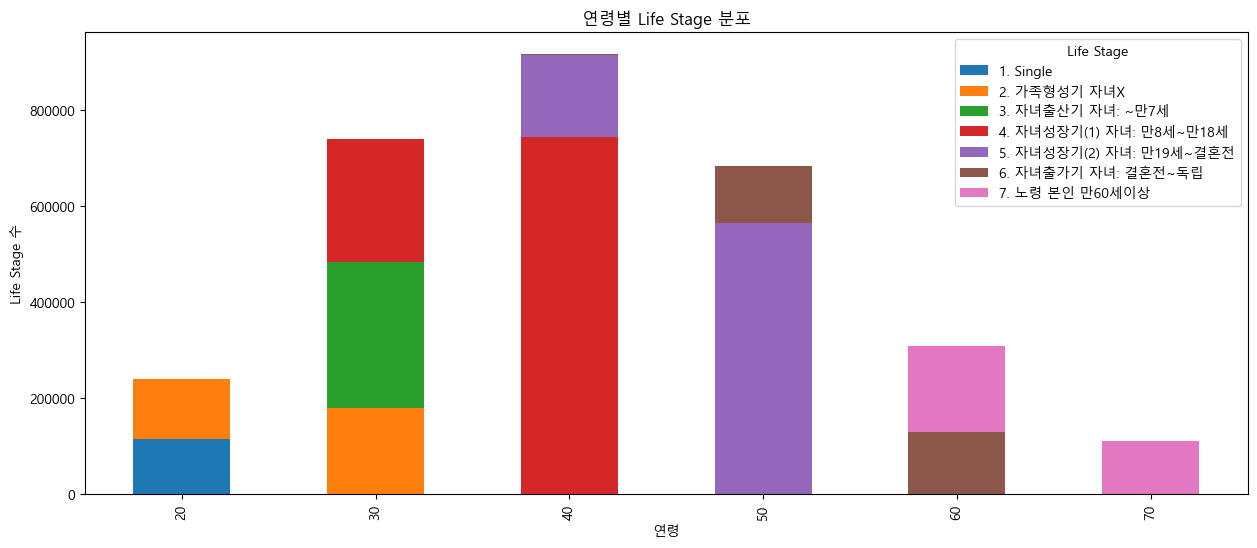

In [21]:
# 연령별 Life Stage 분포
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Life Stage 분포 시각화
life_stage_counts_by_age = data.groupby('연령')['Life_Stage'].value_counts().unstack().fillna(0)
life_stage_counts_by_age.plot(kind='bar', stacked=True, figsize=(15,6))

# 차트 제목 및 라벨 설정
plt.title('연령별 Life Stage 분포')
plt.xlabel('연령')
plt.ylabel('Life Stage 수')

# 범례 설정
stage_labels = [
    '1. Single',
    '2. 가족형성기 자녀X',
    '3. 자녀출산기 자녀: ~만7세',
    '4. 자녀성장기(1) 자녀: 만8세~만18세',
    '5. 자녀성장기(2) 자녀: 만19세~결혼전',
    '6. 자녀출가기 자녀: 결혼전~독립',
    '7. 노령 본인 만60세이상'
]
plt.legend(title='Life Stage', labels=stage_labels)
plt.show()


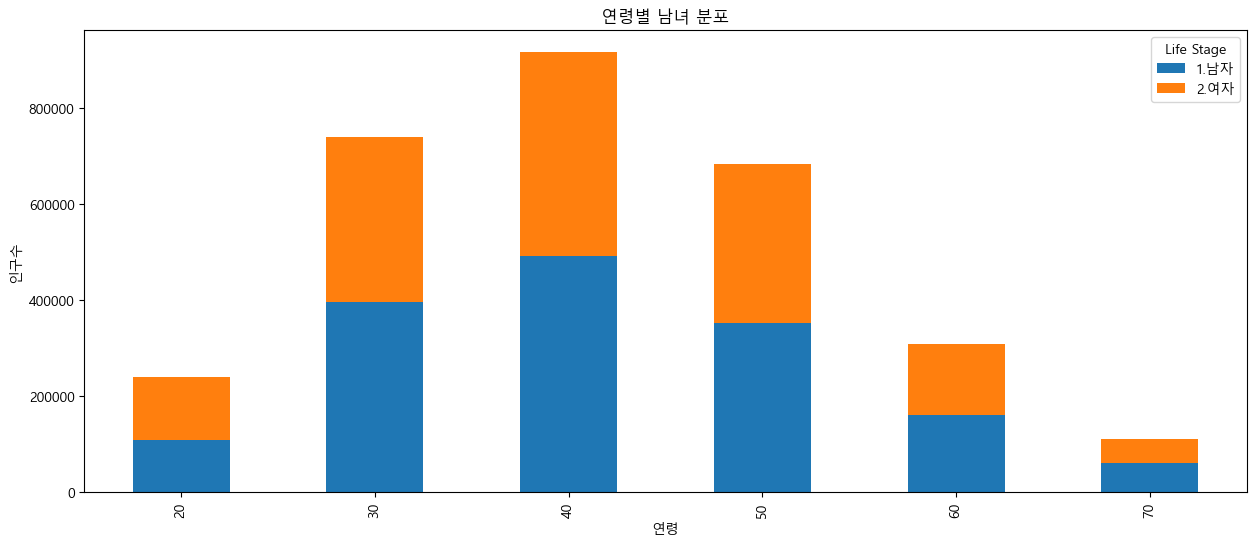

In [23]:
# 연령대별 남녀 분포
# 폰트 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

vip_counts_by_age = data.groupby('연령')['남녀구분코드'].value_counts().unstack().fillna(0)
vip_counts_by_age.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('연령별 남녀 분포')
plt.xlabel('연령')
plt.ylabel('인구수')
plt.legend(title='남녀')
# 범례 설정
stage_labels = [
    '1.남자',
    '2.여자'
]
plt.legend(title='Life Stage', labels=stage_labels)
plt.show()